5
0.010719835872859785 3.186197748431499e-07 8.468412636797132e-13 4.446635912899415e-19


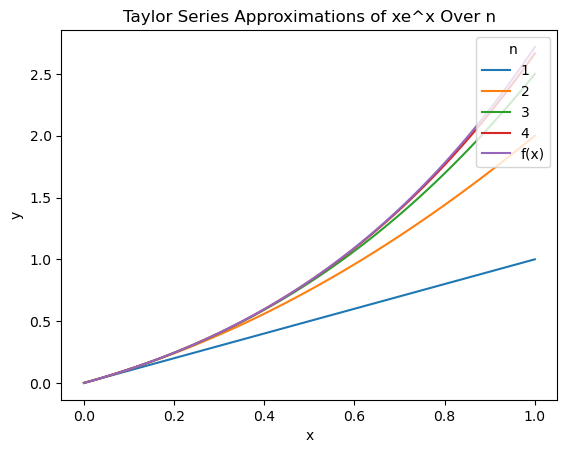

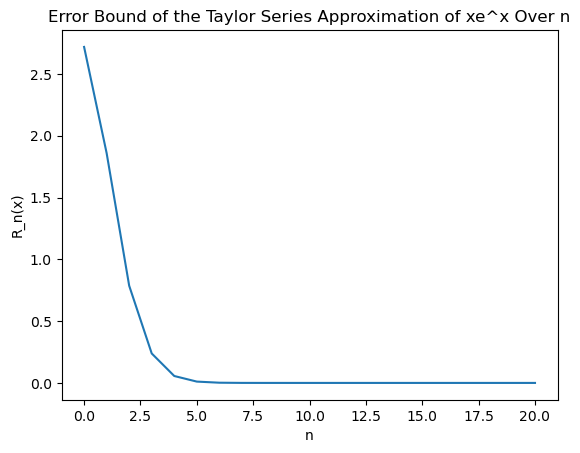

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

def p_x(n, x_0, x):
    p_x = 0
    for i in range(1,n+1):
        numer = (i*pow(np.e,x_0) + x_0*(pow(np.e,x_0)))
        sub = pow(x-x_0,i)
        denom = math.factorial(i)
        p_x = p_x + numer*sub/denom
    return p_x

def points(a, b, NPLOT, n):
    x_0 = 0
    x_pts = []
    y_pts = [0]
    y_temp = []
    for i in range(0, NPLOT):
        x_cur_pt = a + i*((b-a)/(NPLOT-1))
        x_pts.append(x_cur_pt)
    for j in range(1, n+1):
        y_temp = []
        for k in range(0, NPLOT):
            y_temp_pt = p_x(j, x_0, x_pts[k])
            y_temp.append(y_temp_pt)
        y_pts.append(y_temp)
    return x_pts, y_pts

def graph(x_pts, y_pts, NPLOT, n, all_pt_list):
    plt.figure()
    n_pts = []
    for j in range(1,n+1):
        plt.plot(x_pts, y_pts[j])
    real_y_pts = []
    for i in range(0,NPLOT):
        real_y_pts.append(x_pts[i]*pow(np.e,x_pts[i]))
    plt.plot(x_pts, real_y_pts)
    for i in range(1,n+1):
        n_pts.append(i)
    n_pts.append("f(x)")
    plt.legend(n_pts, title = "n", loc = "upper right")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Taylor Series Approximations of xe^x Over n")

    plt.savefig('ex_approx.png')

def errorbnd(x,x_0, x_pts, n):
    n_list = []
    error_list = []
    for i in range(0,n+1):
        n_list.append(i)
        if(abs(x) > abs(x_pts[0])):
            numer = (i)*pow(np.e,x_0) + x*pow(np.e,x)
        else:
            numer = (i)*pow(np.e,x_0) + x_pts[0]*pow(np.e,x_pts[0])
        denom = math.factorial(i+1)
        sub = pow(x - x_0,i+1)
        error_bound = np.abs(numer*sub/denom)
        error_list.append(error_bound)
    print(n_list[5])
    print(error_list[5],error_list[10],error_list[15],error_list[20])
    plt.figure()
    plt.plot(n_list, error_list)

    plt.xlabel("n")
    plt.ylabel("R_n(x)")
    plt.title("Error Bound of the Taylor Series Approximation of xe^x Over n")

    plt.savefig("ex_error_bound.png")



a = 0
b = 1
x_pred = 1
NPLOT = 100
n = 4
max_n_error = 20

all_pt_list = [0]
for i in range(1, NPLOT + 1):
        x_cur_pt = a + i*((b-a)/NPLOT)
        all_pt_list.append(x_cur_pt)

x_pts, y_pts = points(a,b,NPLOT, n)
graph(x_pts, y_pts, NPLOT, n, all_pt_list)
errorbnd(x_pred,a, x_pts, max_n_error)

In [25]:
pow(np.e,1)

2.718281828459045